In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import Statements
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf
from PIL import Image
import numpy as np
class_list = ['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


model = tf.keras.models.load_model("models/model-3.keras")
print(model)

def predict(model,image):
    image = image.resize((256, 256))  
    image = np.array(image) / 255.0 
    image = np.expand_dims(image, axis=0)
    pred = model.predict(image)
    return pred


path = "Dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Aloevera/340.jpg"
image = Image.open(path)
print(image)
pred = predict(model,image)
print(class_list[np.argmax(pred)])

<Sequential name=sequential_3, built=True>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x283 at 0x1AB8EECA6C0>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Ashwagandha


In [2]:
# Declare some constants
Image_Size = (256,256)
Batch_Size = 32

In [3]:
# Load Dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/Coding/MachineLearning/FloraFinder/Dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset",
    shuffle = True,
    image_size = Image_Size,
    batch_size = Batch_Size,
)

Found 5945 files belonging to 40 classes.


In [12]:
# Viewing the class names
Class_Names = dataset.class_names
print(Class_Names)
print("No of classes : ",len(Class_Names))

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']
No of classes :  40


In [ ]:
# Exploring the dataset
print("total data : ",len(dataset))

In [ ]:
186 * 32

In [ ]:
print(dataset.take(1))

In [5]:
for image_batch, batch_label in dataset.take(1): # Takes single batch = 32
    print("Single batch size",len(image_batch))
    print("Single image",image_batch[0].numpy())
    print("Single image shape",image_batch[0].shape)
    print("Batch labels as tensor : ",batch_label)
    print("Batch labels as numpy : ",batch_label.numpy())

Single batch size 32
Single image [[[201.76172  198.76172  189.76172 ]
  [204.16714  201.16714  192.16714 ]
  [210.05273  206.69336  197.69336 ]
  ...
  [124.1799   126.217804 112.25159 ]
  [118.90265  120.9043   106.95621 ]
  [117.58621  119.62082  105.65625 ]]

 [[204.07895  201.07895  192.07895 ]
  [206.20508  203.20508  194.20508 ]
  [211.05685  207.69748  198.69748 ]
  ...
  [121.94162  124.87543  111.83246 ]
  [116.17709  118.36902  105.6698  ]
  [117.17352  120.03989  107.02817 ]]

 [[206.76895  203.76895  194.76895 ]
  [207.3023   204.3023   195.3023  ]
  [211.0957   207.73633  198.73633 ]
  ...
  [118.927734 123.438446 113.13376 ]
  [118.259125 121.82922  111.868286]
  [123.43106  127.85626  117.582825]]

 ...

 [[143.814    140.07767  131.07767 ]
  [150.78812  147.04767  138.04767 ]
  [137.1312   132.05307  123.412445]
  ...
  [199.1933   181.1933   161.1933  ]
  [189.15866  171.15866  151.15866 ]
  [194.19421  176.19421  156.19421 ]]

 [[147.40347  143.40347  134.40347 ]
  [

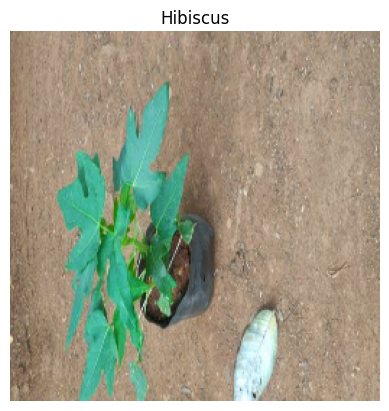

In [10]:
# Visualizing the dataset
for batch_images, batch_labels in dataset.take(1):
    plt.imshow(batch_images[0].numpy().astype("uint8"))
    plt.title(Class_Names[batch_labels[0]])
    plt.axis("off")

In [4]:
# Dataset Splitting

def train_test_val_split(dataset,train_size=0.8,test_size=0.1,val_size=0.1,shuffle = True, shuffle_size = 10000):
    
    if shuffle:
        dataset.shuffle(shuffle_size, seed = 12)
    
    data_len = len(dataset)
    # 80% of training data
    train_data = dataset.take(int(data_len * train_size))
    # 10% test data
    test_data = dataset.skip(len(train_data)).take(int(data_len * test_size))
    # 10% validate data
    val_data =  dataset.skip(len(train_data)).skip(int(data_len * test_size))
    
    return train_data, test_data, val_data

print("func defined")

func defined


In [5]:
train_data, test_data, val_data = train_test_val_split(dataset)
print("Len of training data : ",len(train_data))
print("Len of testing data : ",len(test_data))
print("Len of validate data : ",len(val_data))

Len of training data :  148
Len of testing data :  18
Len of validate data :  20


In [ ]:
# Cache
train_data = train_data.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

print("cached")

In [ ]:
# Data Rescalling and Resizing
rescale_and_resize_layer = tf.keras.Sequential(
[
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])
print(rescale_and_resize_layer)

In [ ]:
# Data Augmentation
augmentaion_layer = tf.keras.Sequential(
[
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

print(augmentaion_layer)

In [ ]:
# CNN Architecture

inp_shape = (256, 256,3)
model = models.Sequential([
    rescale_and_resize_layer,
    augmentaion_layer,
    layers.Conv2D(32,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size= (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(40,activation = "softmax"),
    
])
print("Architecture created")

In [ ]:
# Build the Architecture
model.build(input_shape = inp_shape)
print("Model build successful.")

In [ ]:
# Model summary
model.summary()

In [ ]:
# Compile model
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    reduction='sum_over_batch_size',
    name='sparse_categorical_crossentropy'
),
    metrics = ["accuracy"]
)
print("model compiled")

In [ ]:
for b,l in train_data.take(1):
    print(b[0].shape)

In [ ]:
# Training the model
history = model.fit(
    train_data,
    epochs = 50,
    batch_size = 32,
    verbose = 1,
    validation_data = val_data,

)

In [ ]:
# CNN Architecture
cnn_model = models.Sequential(
[
    rescale_and_resize_layer,
    augmentaion_layer,
    layers.Conv2D(64, (3,3), activation = "relu" ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu" ),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(40,activation = "softmax"),
])
print("Model Arch completed")

In [ ]:
cnn_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
),
    metrics = ["accuracy"]
)
print("Model compiled")

In [ ]:
cnn_model.summary()

In [ ]:
history = cnn_model.fit(
    train_data,
    epochs = 20,
    verbose = 1,
    batch_size = Batch_Size,
    validation_data = val_data,
)


In [ ]:
# Evaluation model hello new epochs epochs
# Iprompt given generating json
# The last epoch
scores = cnn_model.evaluate(test_data)
print(scores)

In [ ]:
# Visualize model bench mark
plt.subplot(1,2,1)
plt.plot(range(25),history.history["accuracy"],label ="Accuracy")
plt.plot(range(25),history.history["val_accuracy"],label ="Val Accuracy")
plt.legend(loc="lower right")

In [ ]:
import numpy as np

In [ ]:
for batch_image, batch_label in test_data.take(1):
#     for i in range(12):
        plt.imshow(batch_image[0].numpy().astype("uint8"))
        plt.title(Class_Names[batch_label[0]])
        t = cnn_model.predict(batch_image)[0]
        print(f"predict : {t} ")
        print(Class_Names[np.argmax(t)])
        

In [ ]:
# Predict function 
def predict_image(model, img):
    img_arr = tf.keras.utils.img_to_array(img[i].numpy())
    img_arr = tf.expand_dims(img_arr)
    pred = model.predict(img_arr)
    pred_class = Class_Names[np.argmax(pred[0])]
    confidence = round(100* (np.max(pred[0])),2)
    return pred_class,confidence
print("Func defined")

In [ ]:
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_class, conf = predict_image(cnn_model,images[i].numpy())
        actual_class = Class_Names[labels[i]]
        plt.title(f"actual : {actual_class} \n pred : {pred_class},{conf}")
        plt.axis("off")

In [1]:
cnn_model.save(f"/kaggle/working/cnn_model")

NameError: name 'cnn_model' is not defined

In [ ]:
print("Hello World")

In [ ]:
import pickle

In [ ]:
with open('/kaggle/working/model.pkl', 'wb') as f:
    pickle.dump(cnn_model, f)

In [161]:

model = tf.keras.models.load_model("models/cnn_model-1.keras")
model

<Sequential name=sequential_2, built=True>

In [162]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │     2,304,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,139,066 (27.23 MB)

 Trainable params: 2,379,688 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,759,378 (18.16 MB)

In [156]:
import h5py

# Open the model file
with h5py.File("models/cnn_model-2.h5", "r") as file:
    # List all groups in the file
    print("Groups in the model file:")
    print(list(file.keys()))

    # If the model configuration is stored in the 'model_weights' group, try loading the model using it
    if "model_weights" in file.keys():
        print("Model weights found. Trying to load the model...")
        model = tf.keras.models.load_model("models/cnn_model-2.h5")
        print("Model loaded successfully.")
    else:
        print("Model configuration not found in the file.")


Groups in the model file:
[]
Model configuration not found in the file.


In [14]:
! pip install visualkeras

   ---------------------------------------- 0.0/45.1 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.1 kB ? eta -:--:--
   ---------------------------------------- 45.1/45.1 kB 562.9 kB/s eta 0:00:00


In [15]:
import visualkeras


In [16]:
visualkeras.layered_view(model)

AttributeError: 'Conv2D' object has no attribute 'output_shape'

In [40]:
scores = model.evaluate(test_data)
print(scores)

18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0311 - loss: 14.0631
[13.772374153137207, 0.0243055559694767]


In [48]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Ashoka
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
Basale


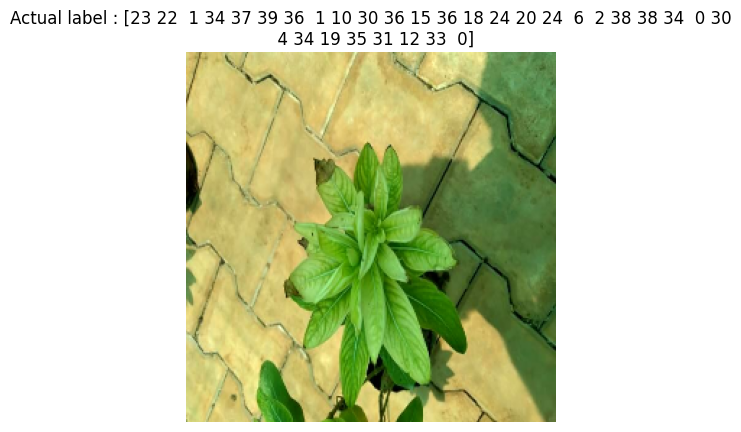

In [94]:
for batch_images, batch_labels in dataset.take(2):
    pred = model.predict(batch_images)
    print(Class_Names[np.argmax(pred[0])])
    plt.imshow(batch_images[0].numpy().astype("uint8"))
    plt.title(f"Actual label : {batch_labels}")
    plt.axis("off")

In [27]:
from io import BytesIO
from PIL import Image
import numpy as np

In [34]:
path = list(r"D:\Coding\MachineLearning\FloraFinder\Dataset\Indian Medicinal Leaves Image Datasets\Medicinal plant dataset\Pomegranate\209.jpg")
# for i in range(len(path)):
#     if path[i] == "\\":
#        path[i] = "/"
# print(path)
# print("".join(path))
# print(path)
print(path)
path = "".join(path).replace("\\", "/")
print(path)

['D', ':', '\\', 'C', 'o', 'd', 'i', 'n', 'g', '\\', 'M', 'a', 'c', 'h', 'i', 'n', 'e', 'L', 'e', 'a', 'r', 'n', 'i', 'n', 'g', '\\', 'F', 'l', 'o', 'r', 'a', 'F', 'i', 'n', 'd', 'e', 'r', '\\', 'D', 'a', 't', 'a', 's', 'e', 't', '\\', 'I', 'n', 'd', 'i', 'a', 'n', ' ', 'M', 'e', 'd', 'i', 'c', 'i', 'n', 'a', 'l', ' ', 'L', 'e', 'a', 'v', 'e', 's', ' ', 'I', 'm', 'a', 'g', 'e', ' ', 'D', 'a', 't', 'a', 's', 'e', 't', 's', '\\', 'M', 'e', 'd', 'i', 'c', 'i', 'n', 'a', 'l', ' ', 'p', 'l', 'a', 'n', 't', ' ', 'd', 'a', 't', 'a', 's', 'e', 't', '\\', 'P', 'o', 'm', 'e', 'g', 'r', 'a', 'n', 'a', 't', 'e', '\\', '2', '0', '9', '.', 'j', 'p', 'g']
D:/Coding/MachineLearning/FloraFinder/Dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Pomegranate/209.jpg


In [35]:
image = Image.open(path,'r')
image = np.array(image)
image.resize(256,256,3)
print(image.shape)

(256, 256, 3)


In [36]:

image = np.expand_dims(image,0)

In [37]:
pred = model2.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [38]:
print(Class_Names[np.argmax(pred[0])])
conf = round(100 * (np.max(pred[0])),2)
print(conf)


Lemon_grass
99.67


In [165]:
val_data

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
import numpy as np

In [5]:
model1 = models.load_model("models/1/1.keras")



In [8]:
tf.saved_model.save(model1,"converted_model/1/")

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [7]:
model2 = models.load_model("models/model-3.keras")


In [8]:
model3 = models.load_model("models/model-4.keras")


In [21]:
score1 = model1.evaluate(test_data)
print(score1)
score2 = model2.evaluate(test_data)
print(score2)
score3 = model3.evaluate(test_data)
print(score3)


18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.0091 - loss: 13.8074
[14.685060501098633, 0.01909722201526165]
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - accuracy: 0.0263 - loss: 17.0158
[16.9360294342041, 0.0173611119389534]
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 332ms/step - accuracy: 0.0163 - loss: 21.0392
[20.30281639099121, 0.013888888992369175]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
(32, 40)
Tulasi 40.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
(32, 40)
Nithyapushpa 79.42


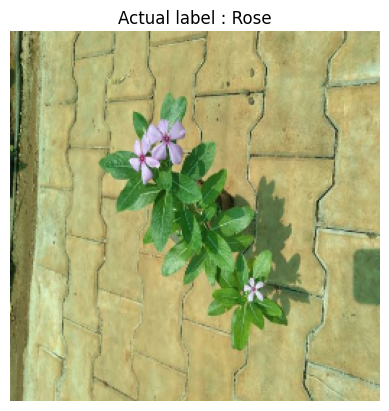

In [24]:
for batch_images, batch_labels in dataset.take(2):
    pred = model2.predict(batch_images)
    print(pred.shape)
    conf = round(100 * (np.max(pred[0])),2)
    print(Class_Names[np.argmax(pred[0])],conf)
    
    plt.imshow(batch_images[0].numpy().astype("uint8"))
    plt.title(f"Actual label : {Class_Names[batch_labels[0]]}")
    plt.axis("off")

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load the pre-trained model
base_model = VGG16(weights='imagenet', include_top=True)

# Preprocess input data
img_path = 'D:/Coding/MachineLearning/FloraFinder/Dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Ashoka/46.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
predictions = base_model.predict(x)

# Decode predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
print('Predictions:', decoded_predictions)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 102s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
Predictions: [('n07714571', 'head_cabbage', 0.2659348), ('n07715103', 'cauliflower', 0.12466681), ('n07720875', 'bell_pepper', 0.118417636)]
